In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import linear_rainbow, het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import LabelEncoder

# Statistical Inferences into the Property Development Industry

## Overview

For individuals and businesses who are new to property development, it can be quite difficult to determine what direction to go in when starting out with building houses and selling them due to the complexity of building and selling homes. Through a statistical analysis of housing data from Kings County, California, we can gain a general insight as to what features go into houses that sell within certain price ranges to get a better idea of where to start.

## Introduction

Property development, or real estate development, is 

Property development is a rewarding business to engage in; however, it can also be a risky business to venture into, and it can be hard to make decisions when starting out. Through a statistical analysis of housing data from Kings County, California, we can form a foundational insight into what kind of decisions to make. Some questions we will try to answer for ourselves are:
- What kinds of factors contribute to a house's base value?
- When building a house, what factors should we look out for before beginning the construction of property?
- What qualities do expensive houses have that cheaper houses don't?
- How does the condition of a house at the point of sale influence the value of a house?



## Exploring the data

For this analysis, we'll be using a .csv file, `kc_house_data.csv`, a set of data for houses in Kings County from the repository's `data` folder that shows the prices houses sold at and their other attributes from the time of sale.

In [2]:
df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Checking for duplicates and nulls:

In [3]:
df.duplicated().sum()

0

In [4]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Checking initial correlations:

In [75]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.004176,0.011592,-0.023803,0.008188,-0.010799,0.021617,-0.012010,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.276295,0.395734,0.036056,0.667951,0.605368,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002386,0.078523,0.026496,0.356563,0.479386,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.067282,0.186451,-0.126479,0.665838,0.686668,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.110230,0.282532,-0.059445,0.762779,0.876448,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.023143,0.075298,-0.008830,0.114731,0.184139,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.021883,0.028436,-0.264075,0.458794,0.523989,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.004176,0.276295,-0.002386,0.067282,0.110230,0.023143,0.021883,1.000000,0.406654,0.017642,0.087383,0.075463,-0.026079,0.087244,0.031057,-0.012772,-0.039864,0.088860,0.032002
view,0.011592,0.395734,0.078523,0.186451,0.282532,0.075298,0.028436,0.406654,1.000000,0.045735,0.249727,0.166299,-0.054564,0.100964,0.085277,0.006141,-0.077894,0.279561,0.073332
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.017642,0.045735,1.000000,-0.146896,-0.158904,-0.361592,-0.061858,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


**Since we are mainly focusing on finding the factors that influence house prices in this analysis, our target variable will be `price`.**
There is a lot of other data to work with, so to make sorting and working with the data a little easier, I will create a new dataframe with the columns that are the most relevant to our questions. To determine which columns to leave out, we can start by checking for multicollinearity in our data. 

In [6]:
multi_df = df.corr().abs().stack().reset_index().sort_values(0, ascending=False)
multi_df['pairs'] = list(zip(multi_df.level_0, multi_df.level_1))
multi_df.set_index(['pairs'], inplace=True)
multi_df.drop(columns=['level_1', 'level_0'], inplace=True)

multi_df.columns = ['cc']
multi_df.drop_duplicates(inplace=True)
multi_df[(multi_df.cc>.75) & (multi_df.cc<1)]

,cc
pairs,
"(sqft_living, sqft_above)",0.876448
"(grade, sqft_living)",0.762779
"(sqft_living, sqft_living15)",0.756402
"(sqft_above, grade)",0.756073
"(sqft_living, bathrooms)",0.755758


From this, we can drop `sqft_above`, `grade`, `sqft_living15`, and `bathrooms` due to their high correlation with `sqft_living`, a feature we will include in our analysis later because it has the highest correlation with our target variable. Other variables were dropped for their low correlation with the target variable or their lack of relevance to our questions.

In [7]:
housing_df = df.drop(['lat', 'long', 'sqft_living15', 'sqft_lot15', 
                      'zipcode', 'view', 'sqft_above', 'sqft_basement', 
                      'date', 'yr_renovated', 'waterfront', 'bathrooms',
                      'grade'], axis = 1)

In [8]:
housing_df.head()

,id,price,bedrooms,sqft_living,sqft_lot,floors,condition,yr_built
0,7129300520,221900.0,3,1180,5650,1.0,3,1955
1,6414100192,538000.0,3,2570,7242,2.0,3,1951
2,5631500400,180000.0,2,770,10000,1.0,3,1933
3,2487200875,604000.0,4,1960,5000,1.0,5,1965
4,1954400510,510000.0,3,1680,8080,1.0,3,1987


As a minor change, I change the `id` column to contain only strings, as each house has its own unique ID, so I would like to separate it from the numerical data in the dataframe to avoid any errors.

In [74]:
housing_df['id'] = housing_df['id'].astype('str')

Before creating our first regression model, we also check for any abnormalities in the data that we will use to filter and transform the data as necessary. To help us, we'll use histograms of all the columns in our new dataframe.

In [11]:
corr_df = housing_df.corr()
corr_df

,price,bedrooms,sqft_living,sqft_lot,floors,condition,yr_built
price,1.000000,0.308787,0.701917,0.089876,0.256804,0.036056,0.053953
bedrooms,0.308787,1.000000,0.578212,0.032471,0.177944,0.026496,0.155670
sqft_living,0.701917,0.578212,1.000000,0.173453,0.353953,-0.059445,0.318152
sqft_lot,0.089876,0.032471,0.173453,1.000000,-0.004814,-0.008830,0.052946
floors,0.256804,0.177944,0.353953,-0.004814,1.000000,-0.264075,0.489193
condition,0.036056,0.026496,-0.059445,-0.008830,-0.264075,1.000000,-0.361592
yr_built,0.053953,0.155670,0.318152,0.052946,0.489193,-0.361592,1.000000


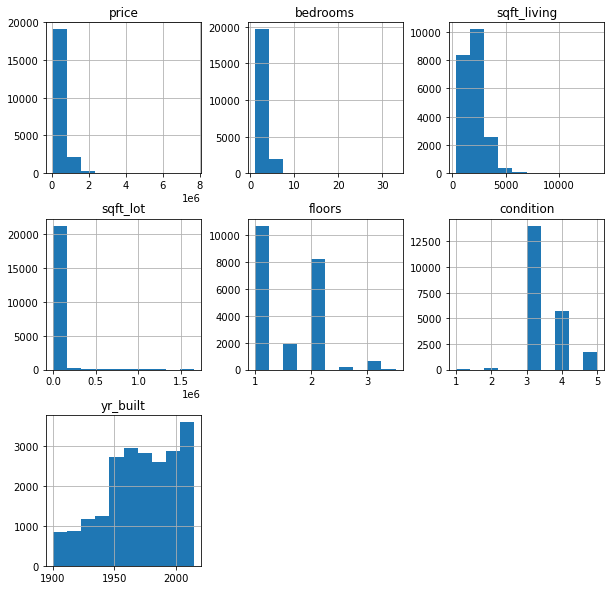

In [13]:
housing_df.hist(figsize=(10,10))
plt.show()

It looks like an outstanding feature of the data is that our continous variables seem to be skewed and contain multiple outliers, which may cause errors in our analysis later on. Our first step to cleaning the data will be to remove any outliers from `price` so that no value is any more than 3 standard deviations from the mean:

In [14]:
z_scores = stats.zscore(housing_df.price)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
filtered_housing_df = housing_df[filtered_entries]
filtered_housing_df.head()

,id,price,bedrooms,sqft_living,sqft_lot,floors,condition,yr_built
0,7129300520,221900.0,3,1180,5650,1.0,3,1955
1,6414100192,538000.0,3,2570,7242,2.0,3,1951
2,5631500400,180000.0,2,770,10000,1.0,3,1933
3,2487200875,604000.0,4,1960,5000,1.0,5,1965
4,1954400510,510000.0,3,1680,8080,1.0,3,1987


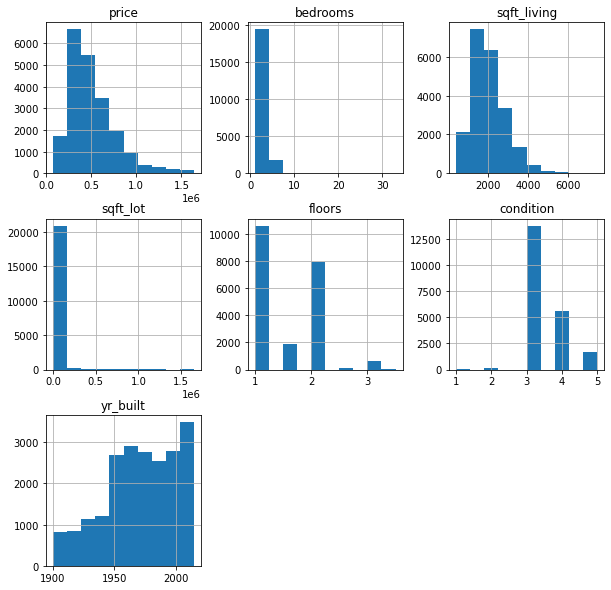

In [15]:
filtered_housing_df.hist(figsize=(10,10))
plt.show()

Then we log transform two continuous features, `sqft_living` and `sqft_lot`, and then scale them by using standardization so that our regression analysis doesn't become affected by extreme values.

<ipython-input-16-12984060e29b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_housing_df[feat] = filtered_housing_df[feat].map(lambda x: np.log(x))


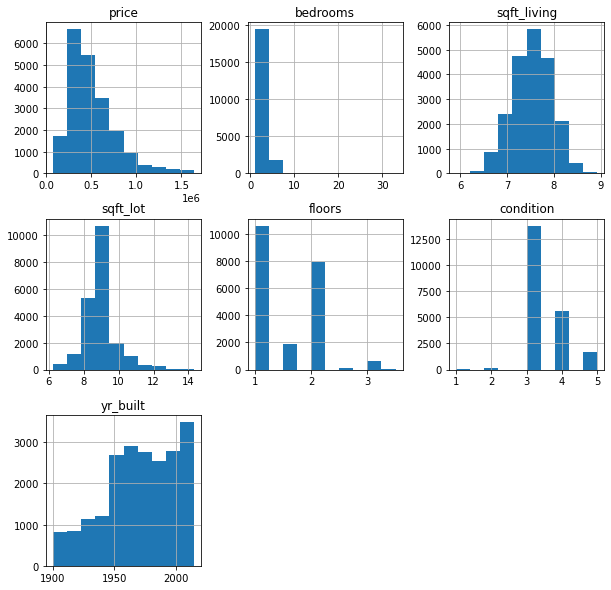

In [16]:
non_normal = filtered_housing_df[['sqft_living', 'sqft_lot']]
for feat in non_normal:
    filtered_housing_df[feat] = filtered_housing_df[feat].map(lambda x: np.log(x))
filtered_housing_df.hist(figsize=(10,10))
plt.show()

In [17]:
filtered_housing_df['sqft_living'] = filtered_housing_df['sqft_living'].map(lambda x: (x - filtered_housing_df['sqft_living'].mean()) / filtered_housing_df['sqft_living'].std())
filtered_housing_df['sqft_lot'] = filtered_housing_df['sqft_lot'].map(lambda x: (x - filtered_housing_df['sqft_lot'].mean()) / filtered_housing_df['sqft_lot'].std())

<ipython-input-17-818775768e6b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_housing_df['sqft_living'] = filtered_housing_df['sqft_living'].map(lambda x: (x - filtered_housing_df['sqft_living'].mean()) / filtered_housing_df['sqft_living'].std())
<ipython-input-17-818775768e6b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_housing_df['sqft_lot'] = filtered_housing_df['sqft_lot'].map(lambda x: (x - filtered_housing_df['sqft_lot'].mean()) / filtered_housing_df['sqft_lot'].std())


In [78]:
filtered_housing_df.head()

,id,price,bedrooms,sqft_living,sqft_lot,floors,condition,yr_built
0,7129300520,221900.0,3,-1.124885,-0.375587,1.0,3,1955
1,6414100192,538000.0,3,0.772925,-0.099188,2.0,3,1951
2,5631500400,180000.0,2,-2.165666,0.260100,1.0,3,1933
3,2487200875,604000.0,4,0.112289,-0.511667,1.0,5,1965
4,1954400510,510000.0,3,-0.263548,0.022726,1.0,3,1987


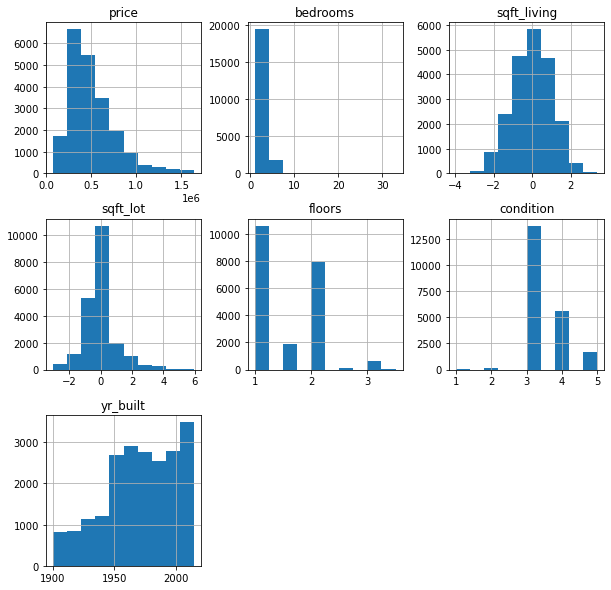

In [77]:
filtered_housing_df.hist(figsize=(10,10))
plt.show()

Now that we have no more outliers and our continuous variables have a more normal distribution, we can start building a regression model from our data! 

## Creating our first model

Since `sqft_lot` seems to have the highest correlation with `price`, our first model will only contain those variables.

In [20]:
fsm_df = filtered_housing_df[['price', 'sqft_living']]
fsm_df.head()

,price,sqft_living
0,221900.0,-1.124885
1,538000.0,0.772925
2,180000.0,-2.165666
3,604000.0,0.112289
4,510000.0,-0.263548


In [21]:
formula = 'price ~ sqft_living'

In [42]:
def ols_analysis(df, formula):
    """
    Takes in a dataframe and a regression formula and creates a regression model
    of the data using OLS regression.
    """
    results = ols(formula=formula, data=df).fit()
    return results

In [43]:
fsm = ols_analysis(fsm_df, formula)
fsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                 1.357e+04
Date:                Sun, 02 May 2021   Prob (F-statistic):               0.00
Time:                        00:27:38   Log-Likelihood:            -2.8900e+05
No. Observations:               21191   AIC:                         5.780e+05
Df Residuals:                   21189   BIC:                         5.780e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     5.07e+05   1391.554    364.348      0.000    5.04e+05     5.1e+05
sqft_living  1.621e+05   1391.587    116.511      0.000    1.59e+05    1.65e+05
==============================================================================
Omnibus:                     3552.688   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6971.851
Skew:                           1.029   Prob(JB):                         0.00
Kurtosis:                       4.913   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
rsquared = fsm.rsquared
params = fsm.params

print(f'Rsquared of FSM: {rsquared}')
print('----------')
print('Beta values of FSM:')
print(params)

Rsquared of FSM: 0.390487072018985
----------
Beta values of FSM:
Intercept      507010.292011
sqft_living    162135.248767
dtype: float64


### Checking assumptions of linear regression

(explain assumptions of linear regression and why they need to be checked) To check the assumptions of linear regression, I have defined the following functions:

In [45]:
def linearity_test(model):
    """
    Takes a linear regression model and calculates the rainbow statistic and p-value
    to check if the model meets the assumption of linearity.
    """
    rainbow_statistic, rainbow_p_value = linear_rainbow(model)
    print("Rainbow statistic:", rainbow_statistic)
    print("Rainbow p-value:", rainbow_p_value)
    if rainbow_p_value > 0.05:
        print()
    
def normality_test(resids):
    """
    Takes the residuals of a linear regression model and creates a Q-Q
    plot to exhibit whether the model meets the assumption of normality.
    """
    fig = sm.graphics.qqplot(resids, dist=stats.norm, line='45', fit=True)
    fig.show()
    
def homoscadasticity(model, resids):
    """
    Takes in a linear regression model and its residuals and creates a scatter plot
    to help determine whether the model meets the assumption of homoscadasticity.
    """
    y_hat = model.predict()
    fig, ax = plt.subplots()
    resids = model.resid
    ax.set(xlabel="Predicted Price",
           ylabel="Residuals (Actual - Predicted Price")
    return ax.scatter(y_hat, resids);

def independence_test(df):
    """
    Takes in a dataframe for a linear regression model and returns a new dataframe
    containing the variance inflation factors for each feature in the model.
    """
    predictors_df = df.drop(df.columns[0], axis=1)
    rows = predictors_df.values
    vif_df = pd.DataFrame()
    vif_df["VIF"] = [variance_inflation_factor(rows, i) for i in range(len(predictors_df.columns))]
    vif_df["feature"] = predictors_df.columns
    return vif_df

### 1. Linearity

In [46]:
linearity_test(fsm)

Rainbow statistic: 1.0031649073819695
Rainbow p-value: 0.4354090973343781



The null hypothesis is that the model is linearly predicted by the features, alternative hypothesis is that it is not. p-value is very low; at an alpha level of 0.05, we would reject the null, therefore this model violates the assumption of linearity

### 2. Normality

<ipython-input-45-66364aacd4a7>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


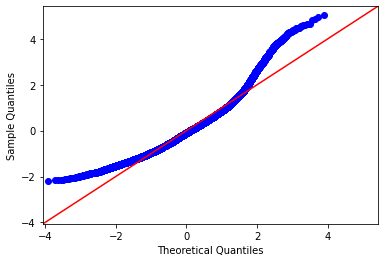

In [47]:
fsm_resids = fsm.resid
normality_test(fsm_resids)

The null hypothesis is that the residuals are normally distributed, alternative hypothesis is that they are not. The JB score p-value is low, thus we would reject the null, meaning that the residuals are not normally distributed. The Q-Q plot also reflects this, showing that the model is skewed.

### 3. Homoscadasticity

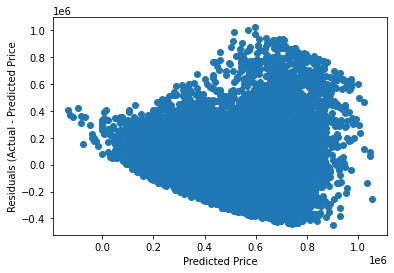

In [48]:
homoscadasticity(fsm, fsm_resids)

The scatter plot has a cone shape, indicating that the scatter of the dependent variable widens as the value of the independent variable increases.

In [72]:
lm, lm_p_value, fvalue, f_p_value = het_breuschpagan(fsm_resids, fsm_df[["sqft_living"]])
print("Lagrange Multiplier p-value:", lm_p_value)
print("F-statistic p-value:", f_p_value)

Lagrange Multiplier p-value: nan
F-statistic p-value: 1.761463818486578e-241


A low F-statistic means we would reject the null; therefore this model is heteroscedastic and violates the assumption of homoscedasticity.

### 4. Independence

The independence assumption means that the independent variables must not be too collinear.  Right now we have only one independent variable, so we don't need to check this yet.

## Adding another numerical feature to the model

In [ ]:
housing_df['sqft_lot'].unique().sum()

In [ ]:
model_2_df = filtered_housing_df[['price', 'sqft_living', 'sqft_lot']]
model_2_df.head()

In [ ]:
model_2 = ols(formula="price ~ sqft_living + sqft_lot", data=model_2_df)
model_2_results = model_2.fit()

In [50]:
model_2_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.395
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     6924.
Date:                Sun, 02 May 2021   Prob (F-statistic):               0.00
Time:                        00:27:38   Log-Likelihood:            -2.8891e+05
No. Observations:               21191   AIC:                         5.778e+05
Df Residuals:                   21188   BIC:                         5.779e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     5.07e+05   1386.135    365.773      0.000    5.04e+05     5.1e+05
sqft_living   1.68e+05   1458.281    115.196      0.000    1.65e+05    1.71e+05
sqft_lot    -1.884e+04   1458.281    -12.923      0.000   -2.17e+04    -1.6e+04
==============================================================================
Omnibus:                     3563.210   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7100.058
Skew:                           1.025   Prob(JB):                         0.00
Kurtosis:                       4.959   Cond. No.                         1.38
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Checking assumptions of linear regression for new model

### 1. Linearity

In [51]:
linearity_test(model_2_results)

Rainbow statistic: 1.0056090531874438
Rainbow p-value: 0.38673187205641973



### 2. Normality

<ipython-input-45-66364aacd4a7>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


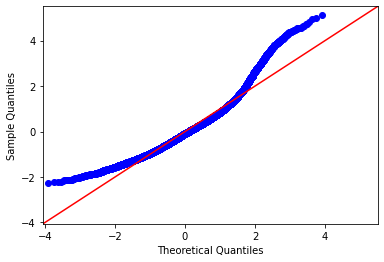

In [52]:
model_2_resids = model_2_results.resid
normality_test(model_2_resids)

### 3. Homoscadasticity

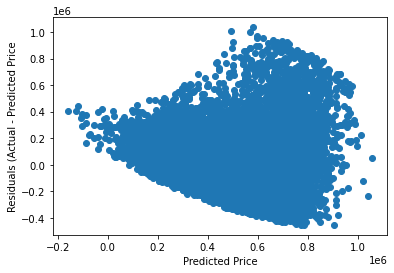

In [53]:
homoscadasticity(model_2_results, model_2_resids)

In [54]:
lm, lm_p_value, fvalue, f_p_value = het_breuschpagan(model_2_resids, model_2_df[["sqft_living", "sqft_lot"]])
print("Lagrange Multiplier p-value:", lm_p_value)
print("F-statistic p-value:", f_p_value)

Lagrange Multiplier p-value: 9.216496181933314e-241
F-statistic p-value: 1.6143404152529052e-245


### 4. Independence

In [55]:
independence_test(model_2_df)

,VIF,feature
0,1.106754,sqft_living
1,1.106754,sqft_lot


## Adding categorical features to the model

We have no variables in this data set that consist of raw categorical data, but we can consider `condition` as a categorical feature, assuming it represents the quality of a house's condition upon sale on a scale from 1 to 5. Because these are already numerical values, we won't have to create dummy variables to represent the data.

In [56]:
model_3_df = filtered_housing_df[['price', 'sqft_living', 'sqft_lot', 'condition']]

In [57]:
model_3 = ols(formula="price ~ sqft_living + sqft_lot + condition", data=model_3_df)
model_3_results = model_3.fit()

In [58]:
model_3_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     4736.
Date:                Sun, 02 May 2021   Prob (F-statistic):               0.00
Time:                        00:27:39   Log-Likelihood:            -2.8881e+05
No. Observations:               21191   AIC:                         5.776e+05
Df Residuals:                   21187   BIC:                         5.777e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    3.993e+05   7419.135     53.814      0.000    3.85e+05    4.14e+05
sqft_living  1.698e+05   1456.006    116.618      0.000    1.67e+05    1.73e+05
sqft_lot    -2.096e+04   1457.917    -14.379      0.000   -2.38e+04   -1.81e+04
condition    3.162e+04   2139.005     14.782      0.000    2.74e+04    3.58e+04
==============================================================================
Omnibus:                     3528.623   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7042.245
Skew:                           1.016   Prob(JB):                         0.00
Kurtosis:                       4.962   Cond. No.                         20.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Checking assumptions

1. Linearity

In [59]:
linearity_test(model_3_results)

Rainbow statistic: 1.0058776631015445
Rainbow p-value: 0.3814845886528299



2. Normality

<ipython-input-45-66364aacd4a7>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


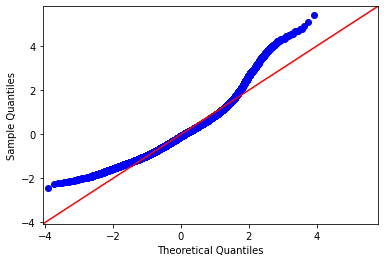

In [60]:
model_3_resids = model_3_results.resid
normality_test(model_3_resids)

3. Homoscadsticity

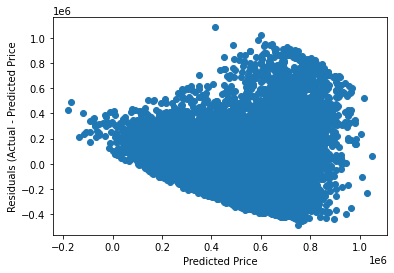

In [61]:
homoscadasticity(model_3_results, model_3_resids)

In [62]:
lm, lm_p_value, fvalue, f_p_value = het_breuschpagan(model_3_resids, model_3_df[["sqft_living", "sqft_lot", "condition"]])
print("Lagrange Multiplier p-value:", lm_p_value)
print("F-statistic p-value:", f_p_value)

Lagrange Multiplier p-value: 0.0
F-statistic p-value: 0.0


4. Independence

In [63]:
independence_test(model_3_df)

,VIF,feature
0,1.107026,sqft_living
1,1.107127,sqft_lot
2,1.000447,condition


I also wanted to see if the amount of floors in houses affected their value in any way. 

In [64]:
filtered_housing_df['floors'].unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

In [65]:
model_4_df = filtered_housing_df[['price', 'sqft_living', 'sqft_lot', 'condition', 'floors']]
model_4 = ols(formula='price ~ sqft_living + sqft_lot + condition + floors', data=model_4_df)
model_4_results = model_4.fit()
model_4_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     3596.
Date:                Sun, 02 May 2021   Prob (F-statistic):               0.00
Time:                        00:27:39   Log-Likelihood:            -2.8875e+05
No. Observations:               21191   AIC:                         5.775e+05
Df Residuals:                   21186   BIC:                         5.776e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    3.326e+05   9851.887     33.764      0.000    3.13e+05    3.52e+05
sqft_living  1.619e+05   1645.876     98.347      0.000    1.59e+05    1.65e+05
sqft_lot    -1.446e+04   1586.888     -9.112      0.000   -1.76e+04   -1.13e+04
condition    3.731e+04   2204.858     16.921      0.000     3.3e+04    4.16e+04
floors       3.176e+04   3100.550     10.244      0.000    2.57e+04    3.78e+04
==============================================================================
Omnibus:                     3601.835   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7265.092
Skew:                           1.030   Prob(JB):                         0.00
Kurtosis:                       4.996   Cond. No.                         29.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
linearity_test(model_4_results)

Rainbow statistic: 1.0033688308970952
Rainbow p-value: 0.4312995561034535



<ipython-input-45-66364aacd4a7>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


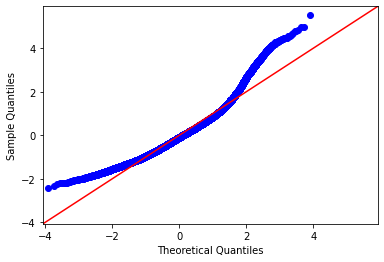

In [67]:
model_4_resids = model_4_results.resid
normality_test(model_4_resids)

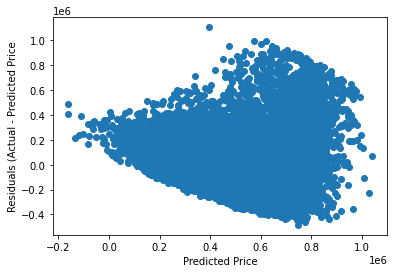

In [68]:
homoscadasticity(model_4_results, model_4_resids)

In [70]:
lm, lm_p_value, fvalue, f_p_value = het_breuschpagan(model_4_resids, model_4_df[["sqft_living", "sqft_lot", "condition", "floors"]])
print("Lagrange Multiplier p-value:", lm_p_value)
print("F-statistic p-value:", f_p_value)

Lagrange Multiplier p-value: 0.0
F-statistic p-value: 0.0


In [71]:
independence_test(model_4_df)

,VIF,feature
0,1.337693,sqft_living
1,1.278592,sqft_lot
2,6.943035,condition
3,7.167965,floors


## Conclusion

- Because our R-squared is so low, it only explains a minority of houses in general
- When using unfiltered data, we do get a higher R-squared, but keep in mind that means that there is more room for error

Answers to questions: 
- What kinds of factors contribute to a house's base value?
- When building a house, what factors should we look out for before beginning the construction of property?
- What qualities do expensive houses have that cheaper houses don't?
- How does the condition of a house at the point of sale influence the value of a house?


### What next?

- Regression analysis on more dense counties, since King County has a small population the data used in this analysis may not be as reliable as data from counties with more dense populations along with other factors like business